### Uso de unsupervised learning para la identificación de Perfiles Educativos y Sociales en el ámbito de la Educación Superior

In [1]:
import pandas as pd
import numpy as np

# Cargar el archivo de Excel
df_matricula = pd.read_excel("base_matricula_datosabiertos.xlsx", engine='openpyxl')
print(df_matricula.shape)

# Filtrar solo los registros donde "AÑO" es igual a 2022
df_matriculas = df_matricula[df_matricula["AÑO"] == 2022]
print(df_matriculas.shape)


(399176, 23)
(140859, 23)


In [2]:
df_matriculas.columns

Index(['AÑO', 'CODIGO_IES', 'CODIGO_CARRERA', 'TIPO_SEDE', 'PROVINCIA_SEDE',
       'CANTON_SEDE', 'SEXO', 'ETNIA', 'PUEBLOS_NACIONALIDAD', 'DISCAPACIDAD',
       'PAIS_NACIONALIDAD', 'PAIS_RESIDENCIA', 'PROVINCIA_RESIDENCIA',
       'CANTON_RESIDENCIA', 'NOMBRE_IES', 'TIPO_FINANCIAMIENTO',
       'NOMBRE_CARRERA', 'CAMPO_AMPLIO', 'CAMPO_ESPECIFICO', 'CAMPO_DETALLADO',
       'NIVEL_FORMACIÓN', 'MODALIDAD', 'tot'],
      dtype='object')

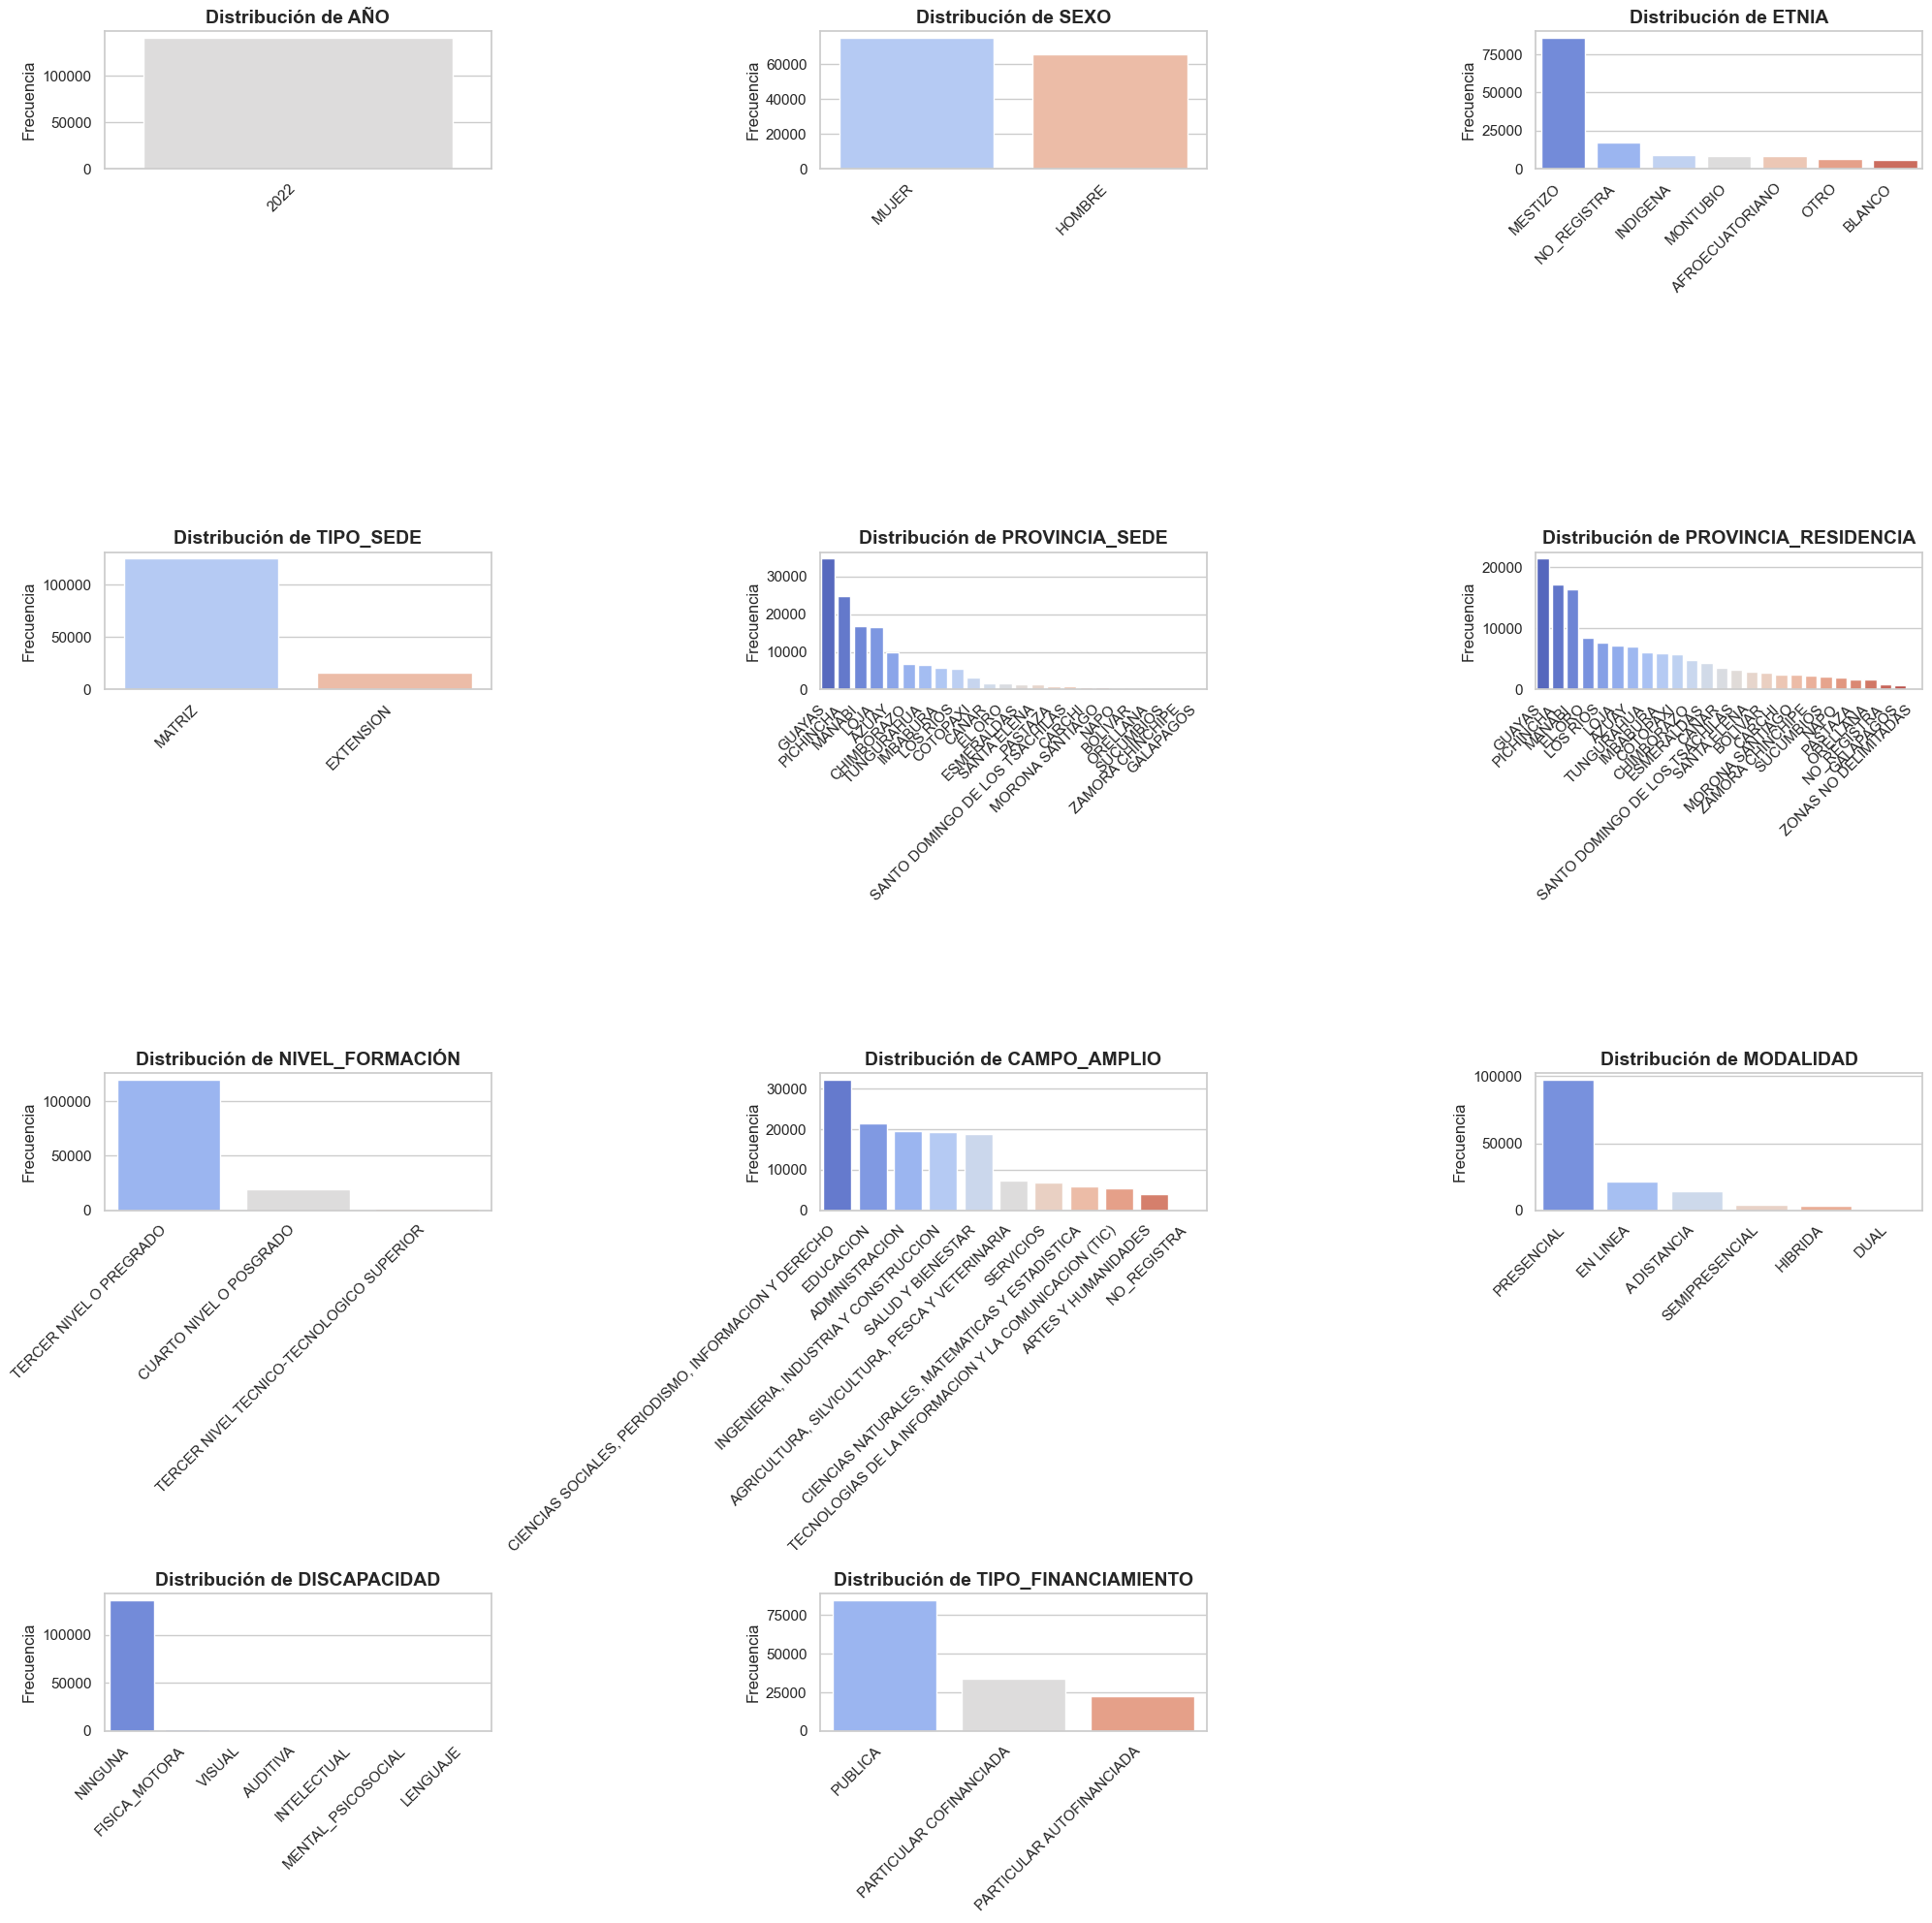

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Establecemos estilo y paleta para hacer el gráfico más profesional
sns.set(style="whitegrid", palette="coolwarm")

# Variables principales para graficar (ajusta según tu dataset)
categorical_columns = ['AÑO', 'SEXO', 'ETNIA', 'TIPO_SEDE', 'PROVINCIA_SEDE', 'PROVINCIA_RESIDENCIA', 'NIVEL_FORMACIÓN', 'CAMPO_AMPLIO', 'MODALIDAD', 'DISCAPACIDAD', 'TIPO_FINANCIAMIENTO']


# Total de columnas a graficar
total_columns = len(categorical_columns)

# Ajustamos el tamaño de la cuadrícula de subplots según el número de gráficos
rows = (total_columns // 3) + (total_columns % 3 > 0)
plt.figure(figsize=(20, rows * 5))

# Creamos subgráficos para las columnas categóricas
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(rows, 3, i)  # Ajustamos filas según el número total
    sns.countplot(data=df_matriculas, x=column, order=df_matriculas[column].value_counts().index, palette="coolwarm")
    plt.title(f"Distribución de {column}", fontsize=14, weight='bold')
    plt.xlabel('')
    plt.ylabel('Frecuencia', fontsize=12)
    plt.xticks(rotation=45, ha="right")


# Ajustamos la disposición de los subgráficos para evitar superposición
plt.tight_layout()

# Mostramos el gráfico
plt.show()


Frecuencia en la columna AÑO:
AÑO
2022    140859
Name: count, dtype: int64 

Frecuencia en la columna CODIGO_IES:
CODIGO_IES
1031    12879
1024     9788
1006     7309
1016     6591
1009     6241
        ...  
1057      234
1068      208
1053      113
1073      105
3013       12
Name: count, Length: 62, dtype: int64 

Frecuencia en la columna CODIGO_CARRERA:
CODIGO_CARRERA
650912A-P-01        2147
650913A-P-01        1638
650331A01-A-1101    1203
650732A-P-01        1090
650331A-P-01        1080
                    ... 
08037                  1
07471                  1
06519                  1
06375                  1
08366                  1
Name: count, Length: 3780, dtype: int64 

Frecuencia en la columna TIPO_SEDE:
TIPO_SEDE
MATRIZ       124622
EXTENSION     16237
Name: count, dtype: int64 

Frecuencia en la columna PROVINCIA_SEDE:
PROVINCIA_SEDE
GUAYAS                            34765
PICHINCHA                         24753
MANABI                            16831
LOJA              

C:\Users\luis.baca\AppData\Local\Temp\ipykernel_13112\2198591419.py:14: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))
C:\Users\luis.baca\AppData\Local\Temp\ipykernel_13112\2198591419.py:14: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))
C:\Users\luis.baca\AppData\Local\Temp\ipykernel_13112\2198591419.py:14: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))
C:\Users\luis.baca\AppData\Local\Temp\ipykernel_13112\2198591419.py:14: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))
C:\Users\luis.baca\AppData\Local\Temp\ipykernel_13112\2198591419.py:14: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))
C:\Users\luis.baca\AppData\Local\Temp\ipykernel_13112\2

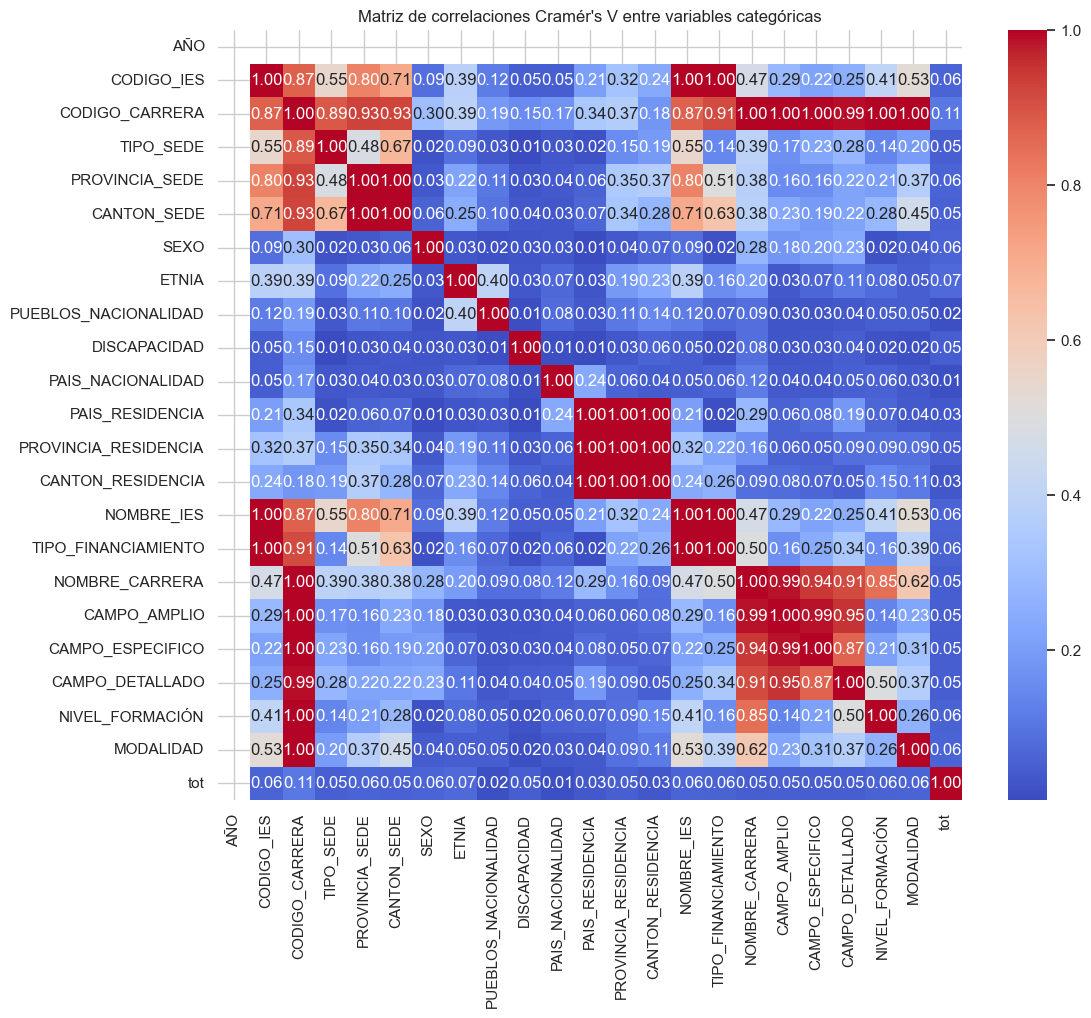

In [4]:
from scipy.stats import chi2_contingency
#Exploración inicial

# 1. Tablas de frecuencias: revisa la distribución de categorías
for col in df_matriculas.columns:
    print(f"Frecuencia en la columna {col}:")
    print(df_matriculas[col].value_counts(), "\n")

# 2. Cálculo de correlaciones entre variables categóricas usando Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Cálculo de Cramér's V entre todas las variables categóricas
corr_matrix = pd.DataFrame(index=df_matriculas.columns, columns=df_matriculas.columns)
for col1 in df_matriculas.columns:
    for col2 in df_matriculas.columns:
        corr_matrix.loc[col1, col2] = cramers_v(df_matriculas[col1], df_matriculas[col2])

# Convertimos la matriz a tipo float
corr_matrix = corr_matrix.astype(float)

# 3. Visualiza la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Matriz de correlaciones Cramér's V entre variables categóricas")
plt.show()

In [5]:
## Eliminar columnas con alta correlación para que mejore el proceso de clustering

# Crear una copia del dataset original para trabajar sobre él
df_reduced = df_matriculas.copy()

# Eliminar las columnas menos relevantes en base a la matriz de Cramér's V y naturaleza de las variables
columns_to_drop = [
    'AÑO',                  #No aporta en la descripción de mi set de datos
    'NOMBRE_CARRERA',       # Redundante con CAMPO_ESPECIFICO y CAMPO_DETALLADO
    'CAMPO_AMPLIO',          # Redundante con CAMPO_ESPECIFICO y CAMPO_DETALLADO
    'CAMPO_DETALLADO',      # Redundante con CAMPO_ESPECIFICO
    'CODIGO_CARRERA',       # Redundante con variables más relevantes como CAMPO_ESPECIFICO
    'CANTON_SEDE',       # Redundante con CANTON_SEDE, que tiene más granularidad
    'CODIGO_IES',
    'CANTON_RESIDENCIA',
    'PAIS_RESIDENCIA',
    'NOMBRE_IES',       # Redundante con TIPO_FINANCIAMIENTO
    'tot'
]

# Eliminar las columnas del dataset
df_reduced = df_reduced.drop(columns=columns_to_drop)

# Ver las columnas que quedan
print("Columnas restantes después de la reducción:")
print(df_reduced.columns)
print(df_reduced.shape)

Columnas restantes después de la reducción:
Index(['TIPO_SEDE', 'PROVINCIA_SEDE', 'SEXO', 'ETNIA', 'PUEBLOS_NACIONALIDAD',
       'DISCAPACIDAD', 'PAIS_NACIONALIDAD', 'PROVINCIA_RESIDENCIA',
       'TIPO_FINANCIAMIENTO', 'CAMPO_ESPECIFICO', 'NIVEL_FORMACIÓN',
       'MODALIDAD'],
      dtype='object')
(140859, 12)


Frecuencia en la columna TIPO_SEDE:
TIPO_SEDE
MATRIZ       124622
EXTENSION     16237
Name: count, dtype: int64 

Frecuencia en la columna PROVINCIA_SEDE:
PROVINCIA_SEDE
GUAYAS                            34765
PICHINCHA                         24753
MANABI                            16831
LOJA                              16458
AZUAY                              9795
CHIMBORAZO                         6787
TUNGURAHUA                         6441
IMBABURA                           5703
LOS RIOS                           5434
COTOPAXI                           3187
CAÑAR                              1750
EL ORO                             1742
ESMERALDAS                         1339
SANTA ELENA                        1322
PASTAZA                             970
SANTO DOMINGO DE LOS TSACHILAS      944
CARCHI                              732
MORONA SANTIAGO                     510
NAPO                                414
BOLIVAR                             388
ORELLANA                      

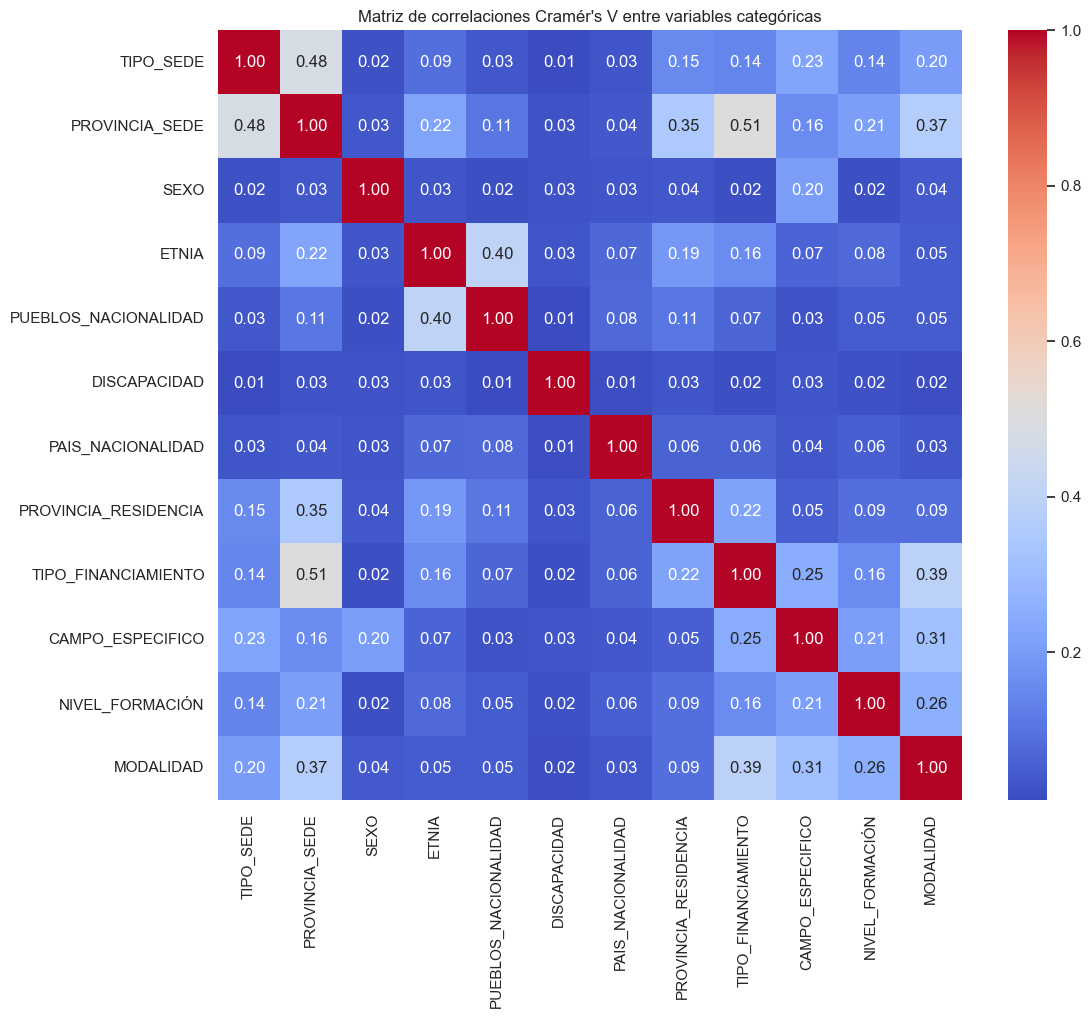

In [6]:
from scipy.stats import chi2_contingency
#Exploración inicial

# 1. Tablas de frecuencias: revisa la distribución de categorías
for col in df_reduced.columns:
    print(f"Frecuencia en la columna {col}:")
    print(df_reduced[col].value_counts(), "\n")

# 2. Cálculo de correlaciones entre variables categóricas usando Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Cálculo de Cramér's V entre todas las variables categóricas
corr_matrix = pd.DataFrame(index=df_reduced.columns, columns=df_reduced.columns)
for col1 in df_reduced.columns:
    for col2 in df_reduced.columns:
        corr_matrix.loc[col1, col2] = cramers_v(df_reduced[col1], df_reduced[col2])

# Convertimos la matriz a tipo float
corr_matrix = corr_matrix.astype(float)

# 3. Visualiza la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Matriz de correlaciones Cramér's V entre variables categóricas")
plt.show()

In [7]:
# Convertir la columna AÑO a tipo object
#df_reduced['AÑO'] = df_reduced['AÑO'].astype('object')


In [8]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Configurar OneHotEncoder con salida no esparsa
encoder = OneHotEncoder(sparse_output=False)

# Realizar One-Hot Encoding a todas las columnas
df_encoded = encoder.fit_transform(df_reduced)

# Obtener los nombres de las columnas codificadas
encoded_columns = encoder.get_feature_names_out(df_reduced.columns)

# Convertir el resultado a un DataFrame con los nombres de columnas
df_encoded = pd.DataFrame(df_encoded, columns=encoded_columns, index=df_reduced.index)

# Ver el resultado
print(df_encoded.shape)
df_encoded.head()

(140859, 243)


,TIPO_SEDE_EXTENSION,TIPO_SEDE_MATRIZ,PROVINCIA_SEDE_AZUAY,PROVINCIA_SEDE_BOLIVAR,PROVINCIA_SEDE_CARCHI,PROVINCIA_SEDE_CAÑAR,PROVINCIA_SEDE_CHIMBORAZO,PROVINCIA_SEDE_COTOPAXI,PROVINCIA_SEDE_EL ORO,PROVINCIA_SEDE_ESMERALDAS,...,CAMPO_ESPECIFICO_VETERINARIA,NIVEL_FORMACIÓN_CUARTO NIVEL O POSGRADO,NIVEL_FORMACIÓN_TERCER NIVEL O PREGRADO,NIVEL_FORMACIÓN_TERCER NIVEL TECNICO-TECNOLOGICO SUPERIOR,MODALIDAD_A DISTANCIA,MODALIDAD_DUAL,MODALIDAD_EN LINEA,MODALIDAD_HIBRIDA,MODALIDAD_PRESENCIAL,MODALIDAD_SEMIPRESENCIAL
258317,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
258318,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
258319,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
258320,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
258321,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
import numpy as np
import pandas as pd

# Calcular la matriz de correlación
correlation_matrix = df_encoded.corr()

# Filtrar las correlaciones mayores a 0.50 o menores a -0.50, excluyendo la diagonal (valores iguales a 1)
filtered_corr = correlation_matrix[(correlation_matrix > 0.50) | (correlation_matrix < -0.50)]
filtered_corr = filtered_corr.where(np.triu(np.ones(filtered_corr.shape), k=1).astype(bool))

# Obtener los pares de variables con correlaciones fuertes
strong_correlations = filtered_corr.stack().reset_index()
strong_correlations.columns = ['Variable 1', 'Variable 2', 'Correlación']

# Mostrar las correlaciones fuertes
strong_correlations = strong_correlations.sort_values(by='Correlación', ascending=False)
strong_correlations




,Variable 1,Variable 2,Correlación
2,PROVINCIA_SEDE_LOJA,MODALIDAD_A DISTANCIA,0.737116
3,PROVINCIA_SEDE_MANABI,PROVINCIA_RESIDENCIA_MANABI,0.649750
6,ETNIA_INDIGENA,PUEBLOS_NACIONALIDAD_NO_REGISTRA,0.515358
1,PROVINCIA_SEDE_GUAYAS,PROVINCIA_RESIDENCIA_GUAYAS,0.511087
12,MODALIDAD_A DISTANCIA,MODALIDAD_PRESENCIAL,-0.505364
9,TIPO_FINANCIAMIENTO_PARTICULAR AUTOFINANCIADA,TIPO_FINANCIAMIENTO_PUBLICA,-0.534385
7,PUEBLOS_NACIONALIDAD_NO_APLICA,PUEBLOS_NACIONALIDAD_NO_REGISTRA,-0.569749
13,MODALIDAD_EN LINEA,MODALIDAD_PRESENCIAL,-0.636313
8,DISCAPACIDAD_FISICA_MOTORA,DISCAPACIDAD_NINGUNA,-0.684323
10,TIPO_FINANCIAMIENTO_PARTICULAR COFINANCIADA,TIPO_FINANCIAMIENTO_PUBLICA,-0.688949


Existen variables con alta correlación que necesitaria eliminar para no duplicar la información al clusterizar

In [10]:
# Eliminar variables altamente correlacionadas:
# No elimino una variable de tipo_financiamiento ya que no es correlación perfecta porque tiene mas de 2 categorías
# Variables a eliminar por correlación perfecta
columns_to_drop = [
    'SEXO_MUJER',
    'TIPO_SEDE_EXTENSION'  # Correlación perfecta con "SEXO_HOMBRE"
]

# Remover las columnas correlacionadas
df_encoded_clean = df_encoded.drop(columns=columns_to_drop, axis=1)

# Mostrar el DataFrame codificado y limpio de variables redundantes
df_encoded_clean

,TIPO_SEDE_MATRIZ,PROVINCIA_SEDE_AZUAY,PROVINCIA_SEDE_BOLIVAR,PROVINCIA_SEDE_CARCHI,PROVINCIA_SEDE_CAÑAR,PROVINCIA_SEDE_CHIMBORAZO,PROVINCIA_SEDE_COTOPAXI,PROVINCIA_SEDE_EL ORO,PROVINCIA_SEDE_ESMERALDAS,PROVINCIA_SEDE_GALAPAGOS,...,CAMPO_ESPECIFICO_VETERINARIA,NIVEL_FORMACIÓN_CUARTO NIVEL O POSGRADO,NIVEL_FORMACIÓN_TERCER NIVEL O PREGRADO,NIVEL_FORMACIÓN_TERCER NIVEL TECNICO-TECNOLOGICO SUPERIOR,MODALIDAD_A DISTANCIA,MODALIDAD_DUAL,MODALIDAD_EN LINEA,MODALIDAD_HIBRIDA,MODALIDAD_PRESENCIAL,MODALIDAD_SEMIPRESENCIAL
258317,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
258318,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
258319,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
258320,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
258321,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399171,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
399172,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
399173,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
399174,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [11]:
# Tomar una muestra aleatoria de 40,000 registros
df_encoded_sample = df_encoded_clean.sample(n=20000, random_state=50)

# Mostrar la muestra
df_encoded_sample


,TIPO_SEDE_MATRIZ,PROVINCIA_SEDE_AZUAY,PROVINCIA_SEDE_BOLIVAR,PROVINCIA_SEDE_CARCHI,PROVINCIA_SEDE_CAÑAR,PROVINCIA_SEDE_CHIMBORAZO,PROVINCIA_SEDE_COTOPAXI,PROVINCIA_SEDE_EL ORO,PROVINCIA_SEDE_ESMERALDAS,PROVINCIA_SEDE_GALAPAGOS,...,CAMPO_ESPECIFICO_VETERINARIA,NIVEL_FORMACIÓN_CUARTO NIVEL O POSGRADO,NIVEL_FORMACIÓN_TERCER NIVEL O PREGRADO,NIVEL_FORMACIÓN_TERCER NIVEL TECNICO-TECNOLOGICO SUPERIOR,MODALIDAD_A DISTANCIA,MODALIDAD_DUAL,MODALIDAD_EN LINEA,MODALIDAD_HIBRIDA,MODALIDAD_PRESENCIAL,MODALIDAD_SEMIPRESENCIAL
284222,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
390138,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
364905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
331618,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
269491,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369836,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
381863,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
306836,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
305678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


c:\Users\luis.baca\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2560 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
c:\Users\luis.baca\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2560 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
c:\Users\luis.baca\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2560 or by setting the environme

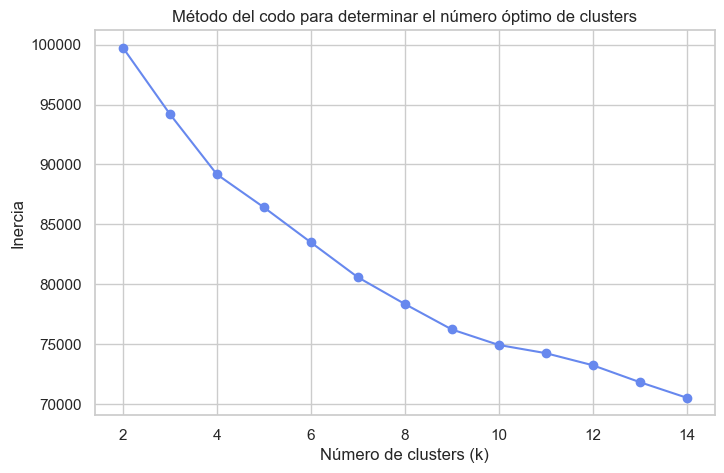

In [12]:
#Determinar el numero de clusters

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

# Definir el rango de clusters que quieres probar
k_values = range(2, 15)
inertia_values = []

# Ejecutar MiniBatchKMeans para cada valor de k
for k in k_values:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=1000)
    kmeans.fit(df_encoded_sample)
    
    # Guardar la inercia (distancia dentro de clusters)
    inertia_values.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Método del codo para determinar el número óptimo de clusters')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()


In [13]:
from sklearn.cluster import MiniBatchKMeans
best_k = 4  # Suponiendo que decides usar 5 clusters
kmeans = MiniBatchKMeans(n_clusters=best_k, random_state=42, batch_size=1000)
kmeans.fit(df_encoded_sample)

# Calcular el Silhouette Score (entre -1 y 1, donde 1 es el mejor)
silhouette_avg = silhouette_score(df_encoded_sample, kmeans.labels_)
print(f"Silhouette Score para {best_k} clusters: {silhouette_avg}")


c:\Users\luis.baca\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2560 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Silhouette Score para 4 clusters: 0.06626058237500618


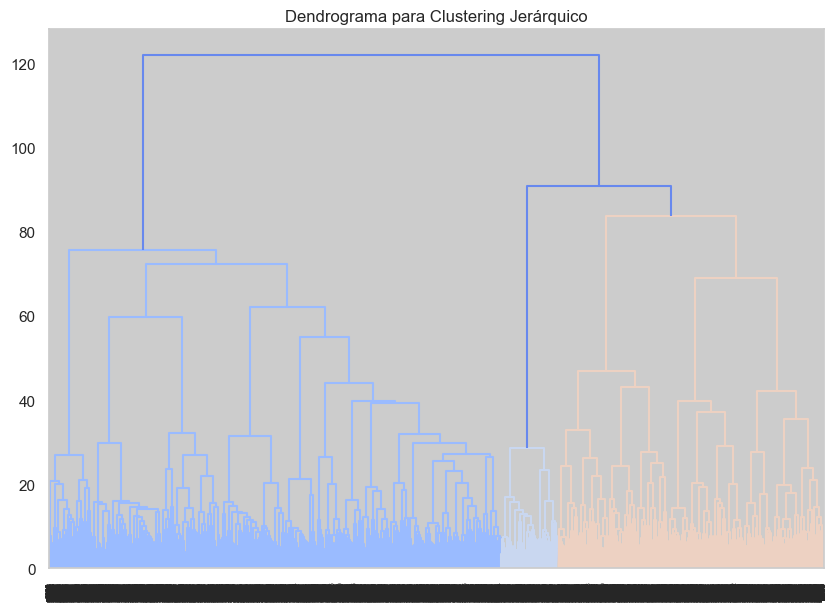

Índice de Correlación Cophenética (CCC): 0.4944276598253738
El coeficiente de Silhouette para 6 clusters es: 0.0629529891174362


In [14]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import cophenet  # Importar cophenet correctamente
import matplotlib.pyplot as plt

# Crear el dendrograma para decidir el número de clusters
plt.figure(figsize=(10, 7))
plt.title("Dendrograma para Clustering Jerárquico")
Z = shc.linkage(df_encoded_sample, method='ward')
dend = shc.dendrogram(Z)
plt.show()

# Calcular el Índice de Correlación Cophenética (CCC)
# pdist calcula la matriz de distancias entre cada par de puntos
original_distances = pdist(df_encoded_sample)
ccc, _ = cophenet(Z, original_distances)  # Calcular el CCC correctamente
print(f"Índice de Correlación Cophenética (CCC): {ccc}")

# Aplicar clustering jerárquico con un número predefinido de clusters (ajustar según el dendrograma)
num_clusters = 6  # Puedes ajustar este valor basándote en el dendrograma

# Como estamos usando el método 'ward', no necesitamos especificar 'metric', ya que siempre usa la distancia euclidiana.
hierarchical_clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')

# Ajustar y predecir los clusters
clusters = hierarchical_clustering.fit_predict(df_encoded_sample)

# Calcular el coeficiente de Silhouette
silhouette_avg = silhouette_score(df_encoded_sample, clusters)
print(f"El coeficiente de Silhouette para {num_clusters} clusters es: {silhouette_avg}")


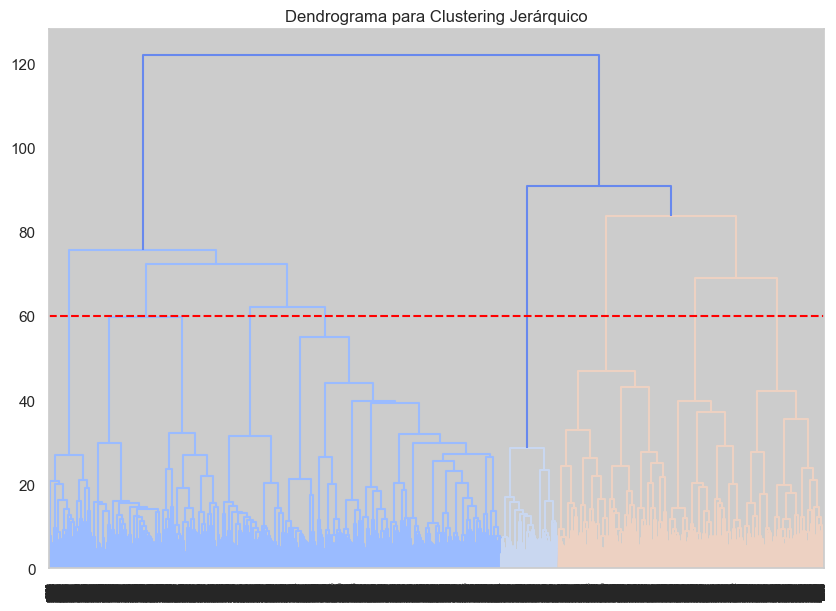

Número de clusters a una altura de corte de 60: 8
Índice de Correlación Cophenética (CCC): 0.4944276598253738


In [18]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import cophenet
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


# Crear el dendrograma para decidir el número de clusters
plt.figure(figsize=(10, 7))
plt.title("Dendrograma para Clustering Jerárquico")
Z = shc.linkage(df_encoded_sample, method='ward')
dend = shc.dendrogram(Z)

# Establecer el punto de corte en el dendrograma, ajusta el valor de y para cortar donde consideres adecuado
cut_height = 60  # Cambia este valor según el corte deseado
plt.axhline(y=cut_height, color='r', linestyle='--')
plt.show()

# Contar el número de clusters en el punto de corte
from scipy.cluster.hierarchy import fcluster

# Generar clusters a partir del dendrograma usando el punto de corte en altura
clusters = fcluster(Z, t=cut_height, criterion='distance')
num_clusters = len(np.unique(clusters))

print(f"Número de clusters a una altura de corte de {cut_height}: {num_clusters}")

# Calcular el Índice de Correlación Cophenética (CCC)
original_distances = pdist(df_encoded_sample)
ccc, _ = cophenet(Z, original_distances)
print(f"Índice de Correlación Cophenética (CCC): {ccc}")


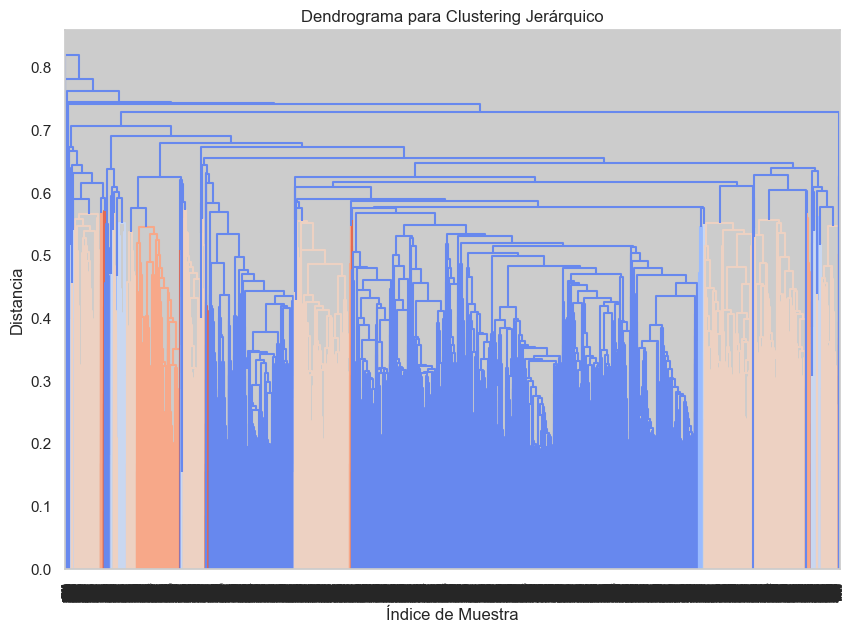

Número de clusters: 19
Índice Cophenético: 0.6611


c:\Users\luis.baca\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\pairwise.py:2317: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
c:\Users\luis.baca\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\pairwise.py:2317: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
c:\Users\luis.baca\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\pairwise.py:2317: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


Silhouette Score: 0.0780


In [19]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# Escoge la métrica de distancia: 'hamming' o 'jaccard'
distance_matrix = pdist(df_encoded_sample, metric='jaccard')  # Cambia a 'jaccard' si lo deseas

# Prueba diferentes métodos de enlace: 'complete', 'average', o 'single'
linkage_matrix = linkage(distance_matrix, method='average')  # Ajusta 'average', 'complete', o 'single'

# Dibuja el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Índice de Muestra')
plt.ylabel('Distancia')
plt.show()

# Para definir los clusters, usa un corte ajustado
from scipy.cluster.hierarchy import fcluster
# Establecer el umbral de corte (ajústalo según el rango observado en el dendrograma)
from scipy.cluster.hierarchy import fcluster, cophenet
from sklearn.metrics import silhouette_score

# Ajustar el umbral de corte a un valor más bajo, según el dendrograma
altura_corte = 0.65  
clusters = fcluster(linkage_matrix, altura_corte, criterion='distance')

# Confirmar si tenemos más de un cluster
num_clusters = len(set(clusters))
print(f"Número de clusters: {num_clusters}")

# Calcular el índice cophenético para evaluar la consistencia del dendrograma
dist_matrix = pdist(df_encoded_sample, metric='jaccard') 
coph_corr, _ = cophenet(linkage_matrix, dist_matrix)
print(f"Índice Cophenético: {coph_corr:.4f}")

# Calcular el Silhouette Score si hay más de un cluster
if num_clusters > 1:
    silhouette_avg = silhouette_score(df_encoded_sample, clusters, metric='jaccard') 
    print(f"Silhouette Score: {silhouette_avg:.4f}")
else:
    print("No se puede calcular el Silhouette Score porque solo se generó un cluster.")


In [ ]:
import pandas as pd
import numpy as np

# Asegúrate de que df_encoded_sample contenga tus datos One-Hot Encoded

# Paso 1: Agrega las etiquetas de clusters al DataFrame
df_clusters = df_encoded_sample.copy()
df_clusters['cluster'] = clusters  # clusters es la salida de fcluster en tu código

# Paso 2: Calcula el promedio de las características de cada cluster
cluster_characteristics = df_clusters.groupby('cluster').mean()
cluster_sizes = df_clusters['cluster'].value_counts().sort_index()  # Cantidad de registros en cada cluster

# Añadir la cantidad de registros como una nueva fila en el DataFrame de características promedio
cluster_characteristics['size'] = cluster_sizes

# Paso 3: Visualiza las características promedio de cada cluster
print("Características promedio de cada cluster:")
print(cluster_characteristics)

# Opcional: Si quieres ver las características principales de cada cluster en términos más legibles
# (por ejemplo, categorías donde el promedio es más cercano a 1, que indican una alta ocurrencia)
for cluster_id in cluster_characteristics.index:
    print(f"\nCaracterísticas principales del Cluster {cluster_id} (tamaño: {cluster_sizes[cluster_id]}):")
    main_features = cluster_characteristics.loc[cluster_id][cluster_characteristics.loc[cluster_id] > 0.5]  # Ajusta el umbral si es necesario
    print(main_features.sort_values(ascending=False))